# Install

In [ ]:
!pip3 install pshmodule

In [ ]:
!pip3 install pickle5

In [ ]:
!pip3 install pandas==1.5.0

In [ ]:
!pip3 install swifter

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Load

In [6]:
import sys
sys.path.append('/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing')
print(sys.path)

['/content', '/env/python', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.9/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing']


In [7]:
from tqdm import tqdm
import config as cfg
import pandas as pd
import swifter
from pshmodule.utils import filemanager as fm

In [8]:
# ref
df_ref = fm.load(cfg.origin_class153_ref)

extension : .pickle
Loaded 181704 records from drive/MyDrive/MemeProject/data/augmentation/origin_class153_ref.pickle


In [9]:
df_ref.head()

,g_num,u_num,material,speech,u,meme,arg1,arg1_2,arg_op1,arg_op2,label
0,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,,,147
1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,,,147
2,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,,,147
3,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,,,147
4,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,,,147


2차 데이터 구축

In [10]:
df_G = fm.load(cfg.data_path_v3_1)
df_H = fm.load(cfg.data_path_v3_2)
df_I = fm.load(cfg.data_path_v3_3)

extension : .xlsx
Loaded 7322 records from drive/MyDrive/MemeProject/data/row_data/meme_v3_1.xlsx
extension : .xlsx
Loaded 7322 records from drive/MyDrive/MemeProject/data/row_data/meme_v3_2.xlsx
extension : .xlsx
Loaded 7322 records from drive/MyDrive/MemeProject/data/row_data/meme_v3_3.xlsx


Merge

In [11]:
new_header = df_G.iloc[1]
df_G = df_G[2:]
df_G.columns = new_header

new_header = df_H.iloc[1]
df_H = df_H[2:]
df_H.columns = new_header

new_header = df_I.iloc[1]
df_I = df_I[2:]
df_I.columns = new_header

In [12]:
df_G = df_G[['관리번호', 'utt',	'발화구분',	'대화소재', '화행(U)', '발화문',	'ARG1',	'ARG_op']]
df_H = df_H[['관리번호', 'utt',	'발화구분',	'대화소재', '화행(U)', '발화문',	'ARG1',	'ARG_op']]
df_I = df_I[['관리번호', 'utt',	'발화구분',	'대화소재', '화행(U)', '발화문',	'ARG1',	'ARG_op']]

In [13]:
df_G.dropna(how='all', axis=0, inplace=True)
df_H.dropna(how='all', axis=0, inplace=True)
df_I.dropna(how='all', axis=0, inplace=True)

In [14]:
print(df_G.shape) # 75 set
print(df_H.shape) # 305 set
print(df_I.shape) # 305 set

(1800, 8)
(7320, 8)
(7320, 8)


In [15]:
df = pd.concat([df_G, df_H, df_I])
df.reset_index(inplace=True, drop=True)

In [16]:
df.shape

(16440, 8)

Numbering

In [17]:
df.head()

1,관리번호,utt,발화구분,대화소재,화행(U),발화문,ARG1,ARG_op
0,Ga0001,1,U,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,아빠가 만들어주신 호박전,NaN
1,NaN,2,U,음식,칭찬,우리 아빠 호박전 지려!,우리 아빠 호박전,NaN
2,NaN,3,U,음식,칭찬,이 호박전 개마싯슴,이 호박전,NaN
3,NaN,4,U,음식,칭찬,아빠 호박전 존맛이라고~!,아빠 호박전,NaN
4,NaN,5,U,음식,칭찬,아빠가 만들어 준 호박전 쪼온맛,아빠가 만들어 준 호박전,NaN


In [18]:
df_ref.tail()

,g_num,u_num,material,speech,u,meme,arg1,arg1_2,arg_op1,arg_op2,label
181699,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님... 힘숨찐ㄷㄷ 상상도 못한 정체 ㄴㅇㄱ,,,전국노래자랑에서,,9
181700,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님 힘숨찐이시네! 상상도 못한 정체 ㄴㅇㄱ,,,전국노래자랑에서,,9
181701,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님 힘숨찐이시라능 상상도 못한 정체 ㄴㅇㄱ,,,전국노래자랑에서,,9
181702,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길좌 이모님이 우승자라구?! 상상도 못한 정체 ㄴㅇㄱ,,,전국노래자랑에서,,9
181703,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,"대길쓰 이모님,, 힘숨찐ㄷㄷ 상상도 못한 정체 ㄴㅇㄱ",,,전국노래자랑에서,,9


In [19]:
df_ref.iloc[-1]['g_num']

1525

In [20]:
# no
num_list = [i+1 for i in range(len(df))]
df['num'] = num_list

# group no
g_list = []
num = int(df_ref.iloc[-1]['g_num']) + 1
for i in range(len(df)):
  if i % 24 == 0 and i != 0:
    num += 1
  g_list.append(num)

df['g_num'] = g_list

In [21]:
df.tail()

1,관리번호,utt,발화구분,대화소재,화행(U),발화문,ARG1,ARG_op,num,g_num
16435,NaN,20,CPO,NaN,NaN,(코웃음),NaN,NaN,16436,2210
16436,NaN,21,CPO,NaN,NaN,불가능 그 잡채...★,NaN,NaN,16437,2210
16437,NaN,22,CPO,NaN,NaN,어디 아픈 거 아니고?,NaN,NaN,16438,2210
16438,NaN,23,CPO,NaN,NaN,일주일도 못 참는다에 한 표...,NaN,NaN,16439,2210
16439,NaN,24,CPO,NaN,NaN,ㄴㅇㄱ,NaN,NaN,16440,2210


In [22]:
df = df[['num', 'g_num', 'utt', '발화구분',	'대화소재', '화행(U)', '발화문', 'ARG1', 'ARG_op']]
df.rename(columns={'utt':'u_num', '발화구분':'type', '발화문':'u',	'대화소재':'material', '화행(U)':'speech', 'ARG1':'arg1', 'ARG_op':'arg_op'}, inplace=True)
df = df.fillna('')

<ipython-input-22-4f45360f3c6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'utt':'u_num', '발화구분':'type', '발화문':'u',	'대화소재':'material', '화행(U)':'speech', 'ARG1':'arg1', 'ARG_op':'arg_op'}, inplace=True)


In [23]:
df.head()

1,num,g_num,u_num,type,material,speech,u,arg1,arg_op
0,1,1526,1,U,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,아빠가 만들어주신 호박전,
1,2,1526,2,U,음식,칭찬,우리 아빠 호박전 지려!,우리 아빠 호박전,
2,3,1526,3,U,음식,칭찬,이 호박전 개마싯슴,이 호박전,
3,4,1526,4,U,음식,칭찬,아빠 호박전 존맛이라고~!,아빠 호박전,
4,5,1526,5,U,음식,칭찬,아빠가 만들어 준 호박전 쪼온맛,아빠가 만들어 준 호박전,


Reshape

In [24]:
result = []
temp = []

for i in tqdm(df.iterrows()):
  temp.append([i[1]['num'], i[1]['g_num'], i[1]['u_num'], i[1]['type'], i[1]['u'], i[1]['arg1'], i[1]['arg_op'], i[1]['material'], i[1]['speech']])
  
  if i[1]['num'] % 24 == 0 and i[1]['num'] != 0:
    temp_u = temp[:6]
    temp_cpr = temp[6:12]
    temp_mm = temp[12:18]
    temp_cpo = temp[18:24]

    for u in temp_u:
      # 밈 조합
      for cpr in temp_cpr:
        for mm in temp_mm:
          for cpo in temp_cpo:
            meme = "{} {} {}".format(cpr[4], mm[4], cpo[4]).strip()
            result.append([u[0], u[1], u[2], u[7], u[8], u[4], meme, u[5], u[6]])
    # 24개 씩 초기화
    temp = []

16440it [00:03, 4586.91it/s]


In [25]:
len(result)

887760

In [26]:
df = pd.DataFrame(result, columns=[['num', 'g_num', 'u_num', 'material', 'speech', 'u', 'meme', 'arg1', 'arg_op']])

In [27]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

arg_op 쉼표 기준으로 쪼개기

In [28]:
df['arg_op1'] = df.arg_op.swifter.apply(lambda x: x.str.split(',').str[0])
df['arg_op2'] = df.arg_op.swifter.apply(lambda x: x.str.split(',').str[1])

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
df.fillna('', inplace=True)

In [30]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [31]:
df = df[['num', 'g_num', 'u_num', 'material', 'speech', 'u', 'meme', 'arg1', 'arg_op1', 'arg_op2']]

In [32]:
df.head()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2
0,1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,체고지! K피자!,아빠가 만들어주신 호박전,,
1,1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,체고지! K-PIZZA,아빠가 만들어주신 호박전,,
2,1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,RGRG K피자!,아빠가 만들어주신 호박전,,
3,1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,RGRG K-PIZZA,아빠가 만들어주신 호박전,,
4,1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,역시 K피자!,아빠가 만들어주신 호박전,,


In [33]:
df.iloc[430:440]

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2
430,123,1531,3,자기개발,계획,오늘 면허 셤 공부 부순다 콱시,운전하려고..? 제발 그만해....,면허 셤,오늘,
431,123,1531,3,자기개발,계획,오늘 면허 셤 공부 부순다 콱시,운전하려고..? ...나 너무 무서워,면허 셤,오늘,
432,123,1531,3,자기개발,계획,오늘 면허 셤 공부 부순다 콱시,운전하려고..? 이러다가는 다하... 죽어..!,면허 셤,오늘,
433,123,1531,3,자기개발,계획,오늘 면허 셤 공부 부순다 콱시,운전하려고..? 제발 그만해... 나... 너무 무서워... 이러다가는 다~ 죽어!,면허 셤,오늘,
434,123,1531,3,자기개발,계획,오늘 면허 셤 공부 부순다 콱시,운전하려고..? 제발 그만해 나 너무 무서워 이러다가는 다 죽어,면허 셤,오늘,
435,123,1531,3,자기개발,계획,오늘 면허 셤 공부 부순다 콱시,운전? 아앗 안 돼...! 제발 그만해....,면허 셤,오늘,
436,123,1531,3,자기개발,계획,오늘 면허 셤 공부 부순다 콱시,운전? 아앗 안 돼...! ...나 너무 무서워,면허 셤,오늘,
437,123,1531,3,자기개발,계획,오늘 면허 셤 공부 부순다 콱시,운전? 아앗 안 돼...! 이러다가는 다하... 죽어..!,면허 셤,오늘,
438,123,1531,3,자기개발,계획,오늘 면허 셤 공부 부순다 콱시,운전? 아앗 안 돼...! 제발 그만해... 나... 너무 무서워... 이러다가는 ...,면허 셤,오늘,
439,123,1531,3,자기개발,계획,오늘 면허 셤 공부 부순다 콱시,운전? 아앗 안 돼...! 제발 그만해 나 너무 무서워 이러다가는 다 죽어,면허 셤,오늘,


# Reduce Class

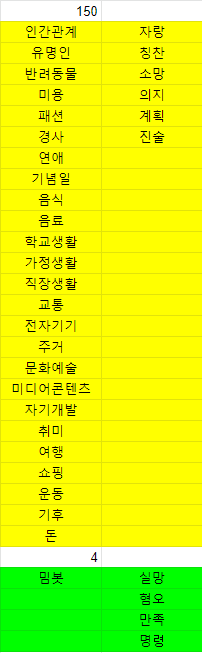

#### 대화소재

In [34]:
df.material.value_counts()

(material,)
밈봇             14166
음료              3162
여행              2994
음식              2808
패션              2772
미용              2592
자기개발            2364
직장생활            2352
반려동물            2340
교통              2286
인간관계            2262
학교생활            2208
미디어콘텐츠          2208
운동              2184
취미              2070
문화예술            2070
전자기기            1986
기후              1980
유명인             1836
돈               1830
경사              1806
가정생활            1746
기념일             1746
쇼핑              1728
연애              1578
주거              1542
dtype: int64

In [35]:
df.speech.value_counts()

(speech,)
진술           10914
칭찬            8982
계획            8868
자랑            8826
소망            8658
의지            8202
명령            4272
실망            3696
만족            3690
혐오            2508
dtype: int64

In [36]:
df_table = fm.load(cfg.label)

extension : .pickle
Loaded 154 records from drive/MyDrive/MemeProject/data/tabel.pickle


#### Make Label

In [37]:
com_dict = {i[1]['name']: i[1]['index'] for i in df_table.iterrows()}

In [38]:
class_list = []

for i in df.iterrows():
  class_list.append(com_dict[(i[1]['material'], i[1]['speech'])])

In [39]:
df['label'] = class_list

In [44]:
df.head()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2,label
0,1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,체고지! K피자!,아빠가 만들어주신 호박전,,,101
1,1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,체고지! K-PIZZA,아빠가 만들어주신 호박전,,,101
2,1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,RGRG K피자!,아빠가 만들어주신 호박전,,,101
3,1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,RGRG K-PIZZA,아빠가 만들어주신 호박전,,,101
4,1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,역시 K피자!,아빠가 만들어주신 호박전,,,101


#### arg1

In [ ]:
df['arg1_temp'] = [i[1]['arg1'].split(',')[0] for i in tqdm(df.iterrows())]

arg1_2_temp = []
for i in df.iterrows():
  if ',' in i[1]['arg1']:
    arg1_2_temp.append(i[1]['arg1'].split(',')[1])
  else:
    arg1_2_temp.append('')
df['arg1_2_temp'] = arg1_2_temp

In [85]:
del df['arg1']

In [87]:
df.rename(columns={'arg1_temp':'arg1', 'arg1_2_temp':'arg1_2'}, inplace=True)

In [90]:
df = df[['g_num', 'u_num', 'material', 'speech', 'u', 'meme', 'arg1', 'arg1_2', 'arg_op1', 'arg_op2', 'label']]

In [91]:
df.head()

,g_num,u_num,material,speech,u,meme,arg1,arg1_2,arg_op1,arg_op2,label
0,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,체고지! K피자!,아빠가 만들어주신 호박전,,,,101
1,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,체고지! K-PIZZA,아빠가 만들어주신 호박전,,,,101
2,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,RGRG K피자!,아빠가 만들어주신 호박전,,,,101
3,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,RGRG K-PIZZA,아빠가 만들어주신 호박전,,,,101
4,1526,1,음식,칭찬,아빠가 만들어주신 호박전 체고라능!!,역시 K피자!,아빠가 만들어주신 호박전,,,,101


#### Ref Save

In [92]:
df_ref.shape

(181704, 11)

In [93]:
df.shape

(68616, 11)

In [94]:
df_ref.tail()

,g_num,u_num,material,speech,u,meme,arg1,arg1_2,arg_op1,arg_op2,label
181699,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님... 힘숨찐ㄷㄷ 상상도 못한 정체 ㄴㅇㄱ,,,전국노래자랑에서,,9
181700,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님 힘숨찐이시네! 상상도 못한 정체 ㄴㅇㄱ,,,전국노래자랑에서,,9
181701,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님 힘숨찐이시라능 상상도 못한 정체 ㄴㅇㄱ,,,전국노래자랑에서,,9
181702,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길좌 이모님이 우승자라구?! 상상도 못한 정체 ㄴㅇㄱ,,,전국노래자랑에서,,9
181703,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,"대길쓰 이모님,, 힘숨찐ㄷㄷ 상상도 못한 정체 ㄴㅇㄱ",,,전국노래자랑에서,,9


In [95]:
df.tail()

,g_num,u_num,material,speech,u,meme,arg1,arg1_2,arg_op1,arg_op2,label
68611,2210,6,음식,의지,나 다시는 라면 안 먹을 거야1,쩝쩝박사인디...? (코웃음),라면,,다시는,,98
68612,2210,6,음식,의지,나 다시는 라면 안 먹을 거야1,쩝쩝박사인디...? 불가능 그 잡채...★,라면,,다시는,,98
68613,2210,6,음식,의지,나 다시는 라면 안 먹을 거야1,쩝쩝박사인디...? 어디 아픈 거 아니고?,라면,,다시는,,98
68614,2210,6,음식,의지,나 다시는 라면 안 먹을 거야1,쩝쩝박사인디...? 일주일도 못 참는다에 한 표...,라면,,다시는,,98
68615,2210,6,음식,의지,나 다시는 라면 안 먹을 거야1,쩝쩝박사인디...? ㄴㅇㄱ,라면,,다시는,,98


In [96]:
df_result = pd.concat([df_ref, df])

In [101]:
df_result.reset_index(drop=True, inplace=True)

In [102]:
df_result.tail()

,g_num,u_num,material,speech,u,meme,arg1,arg1_2,arg_op1,arg_op2,label
250315,2210,6,음식,의지,나 다시는 라면 안 먹을 거야1,쩝쩝박사인디...? (코웃음),라면,,다시는,,98
250316,2210,6,음식,의지,나 다시는 라면 안 먹을 거야1,쩝쩝박사인디...? 불가능 그 잡채...★,라면,,다시는,,98
250317,2210,6,음식,의지,나 다시는 라면 안 먹을 거야1,쩝쩝박사인디...? 어디 아픈 거 아니고?,라면,,다시는,,98
250318,2210,6,음식,의지,나 다시는 라면 안 먹을 거야1,쩝쩝박사인디...? 일주일도 못 참는다에 한 표...,라면,,다시는,,98
250319,2210,6,음식,의지,나 다시는 라면 안 먹을 거야1,쩝쩝박사인디...? ㄴㅇㄱ,라면,,다시는,,98


In [105]:
fm.save(cfg.origin_class153_ref, df_result)

Saved 250320 records


#### Lable Table Resave

##### Modify existing class

In [34]:
df_table.head()

,name,index
0,"(가정생활, 계획)",0
1,"(가정생활, 소망)",1
2,"(가정생활, 의지)",2
3,"(가정생활, 자랑)",3
4,"(가정생활, 진술)",4


In [35]:
com_dict = {i[1]['name']: i[1]['index'] for i in df_table.iterrows()}

In [40]:
for i in com_dict.items():
  if i[1] >= 102:
    com_dict[i[0]] += 1

In [42]:
com_dict[('인간관계', '계획')] = 102

In [49]:
sorted_dict = dict(sorted(com_dict.items(), key = lambda item: item[1]))

In [ ]:
sorted_dict

In [52]:
df_table = pd.DataFrame.from_dict(data=sorted_dict, orient='index')

In [53]:
df_table.reset_index(inplace=True)

In [54]:
df_table.rename(columns={'index':'name', 0:'index'}, inplace=True)

In [56]:
df_table.tail()

,name,index
149,"(학교생활, 칭찬)",149
150,"(밈봇, 만족)",150
151,"(밈봇, 명령)",151
152,"(밈봇, 실망)",152
153,"(밈봇, 혐오)",153


In [57]:
fm.save(cfg.label, df_table)

Saved 154 records


##### Modify Data_v1

In [29]:
df_table = fm.load(cfg.label)

extension : .pickle
Loaded 154 records from drive/MyDrive/MemeProject/data/tabel.pickle


In [32]:
df_table.head()

,name,index
0,"(가정생활, 계획)",0
1,"(가정생활, 소망)",1
2,"(가정생활, 의지)",2
3,"(가정생활, 자랑)",3
4,"(가정생활, 진술)",4


v1 ref

In [68]:
# ref
df_ref = fm.load(cfg.origin_class153_ref)

extension : .pickle
Loaded 181704 records from drive/MyDrive/MemeProject/data/augmentation/origin_class153_ref.pickle


In [70]:
df_ref.head()

,g_num,u_num,material,speech,u,meme,arg1,arg1_2,arg_op1,arg_op2,label
0,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,,,146
1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,,,146
2,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,,,146
3,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,,,146
4,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,,,146


In [71]:
table_dict = {i[1]['name']: i[1]['index'] for i in df_table.iterrows()}

In [72]:
relabel = [table_dict[(i[1]['material'], i[1]['speech'])] for i in df_ref.iterrows()]

In [73]:
df_ref['relabel'] = relabel

In [74]:
del df_ref['label']

In [75]:
df_ref.rename(columns={'relabel':'label'}, inplace=True)

In [76]:
df_ref.head()

,g_num,u_num,material,speech,u,meme,arg1,arg1_2,arg_op1,arg_op2,label
0,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,,,147
1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,,,147
2,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,,,147
3,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,,,147
4,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,,,147


In [77]:
fm.save(cfg.origin_class153_ref, df_ref)

Saved 181704 records


v1 result

In [30]:
df_temp = fm.load(cfg.userdict_aug)

extension : .pickle
Loaded 72015 records from drive/MyDrive/MemeProject/data/report/userdict_aug.pickle


In [31]:
df_temp.head()

,g_num,u_num,material,speech,u,arg,arg_op1,arg_op2,user_dic,label
0,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,중간고사,,,None,146
1,1,1,학교생활,자랑,와타시 중간고사 반에서 1등했어,중간고사,,,와타시,146
2,1,1,학교생활,자랑,와따시 중간고사 반에서 1등했어,중간고사,,,와따시,146
3,1,1,학교생활,자랑,나 중간시험 반에서 1등했어,중간시험,,,None,146
4,1,1,학교생활,자랑,와타시 중간시험 반에서 1등했어,중간시험,,,와타시,146


In [35]:
table_dict = {i[1]['name']: i[1]['index'] for i in df_table.iterrows()}

In [37]:
relabel = [table_dict[(i[1]['material'], i[1]['speech'])] for i in df_temp.iterrows()]

In [39]:
df_temp['relabel'] = relabel

In [50]:
del df_temp['label']

In [54]:
df_temp.rename(columns={'relabel':'label'}, inplace=True)

In [55]:
df_temp.head()

,g_num,u_num,material,speech,u,arg,arg_op1,arg_op2,user_dic,label
0,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,중간고사,,,None,147
1,1,1,학교생활,자랑,와타시 중간고사 반에서 1등했어,중간고사,,,와타시,147
2,1,1,학교생활,자랑,와따시 중간고사 반에서 1등했어,중간고사,,,와따시,147
3,1,1,학교생활,자랑,나 중간시험 반에서 1등했어,중간시험,,,None,147
4,1,1,학교생활,자랑,와타시 중간시험 반에서 1등했어,중간시험,,,와타시,147


In [56]:
fm.save("drive/MyDrive/MemeProject/data/report/userdict_aug.xlsx", df_temp)

Saved 72015 records


In [57]:
fm.save("drive/MyDrive/MemeProject/data/augmentation/userdict_aug.pickle", df_temp)

Saved 72015 records


Count

In [58]:
df_temp = df_temp[['material', 'speech', 'label', 'u']]

In [59]:
df_temp.drop_duplicates(inplace=True)
df_temp.reset_index(drop=True, inplace=True)

<ipython-input-59-3c628d64f46f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop_duplicates(inplace=True)


In [60]:
check = {f"{i[1]['material']}, {i[1]['speech']}, {i[1]['label']}": 0 for i in df_temp.iterrows()}

In [61]:
for i in df_temp.iterrows():
  check[f"{i[1]['material']}, {i[1]['speech']}, {i[1]['label']}"] += 1

In [62]:
temp = sorted(check.items(), key=lambda x: x[1], reverse=True)

In [63]:
print(temp)

[('학교생활, 자랑, 147', 1700), ('기념일, 계획, 18', 1480), ('반려동물, 자랑, 57', 1294), ('자기개발, 계획, 108', 1185), ('자기개발, 의지, 110', 1182), ('반려동물, 진술, 58', 1079), ('쇼핑, 칭찬, 65', 988), ('기후, 진술, 28', 950), ('기후, 자랑, 27', 926), ('가정생활, 진술, 4', 815), ('학교생활, 계획, 144', 793), ('미디어콘텐츠, 진술, 46', 789), ('교통, 소망, 13', 738), ('돈, 소망, 31', 675), ('직장생활, 의지, 128', 669), ('문화예술, 칭찬, 41', 667), ('취미, 의지, 134', 665), ('음료, 진술, 94', 655), ('음식, 칭찬, 101', 636), ('미디어콘텐츠, 계획, 42', 625), ('주거, 소망, 121', 603), ('패션, 칭찬, 143', 582), ('미디어콘텐츠, 자랑, 45', 570), ('취미, 계획, 132', 569), ('주거, 칭찬, 125', 568), ('여행, 소망, 67', 557), ('연애, 자랑, 75', 553), ('운동, 자랑, 81', 549), ('패션, 자랑, 141', 548), ('유명인, 칭찬, 89', 542), ('가정생활, 계획, 0', 542), ('기념일, 의지, 20', 530), ('쇼핑, 자랑, 63', 529), ('미용, 의지, 50', 528), ('여행, 자랑, 69', 522), ('교통, 칭찬, 17', 515), ('전자기기, 자랑, 117', 514), ('음식, 의지, 98', 513), ('교통, 진술, 16', 509), ('음식, 진술, 100', 508), ('인간관계, 진술, 106', 503), ('여행, 칭찬, 71', 498), ('미용, 계획, 48', 491), ('밈봇, 명령, 151', 491), ('문화예술, 의지, 38', 

In [64]:
temp_check = pd.DataFrame(temp, columns=['label', '건수'])

In [65]:
temp_check['대화소재'] = temp_check.label.apply(lambda x: x.split(',')[0])
temp_check['화행'] = temp_check.label.apply(lambda x: x.split(',')[1])
temp_check['레이블'] = temp_check.label.apply(lambda x: x.split(',')[2])

In [66]:
temp_check = temp_check[['대화소재', '화행', '레이블', '건수']]

In [67]:
fm.save('drive/MyDrive/MemeProject/data/report/count.xlsx', temp_check)

Saved 153 records
